In [4]:
# !pip install sklearn pandas matplotlib

In [21]:
import pandas as pd
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split

# read the training data


In [6]:
data = pd.read_csv("train/train.csv").dropna()
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4521252780,1,11,2,0,5,5,1,0,0,...,0,15521,6.8,18175,222,48,-544,-2063,22.2,1552.1
1,4516789805,1,17,2,0,9,4,8,1,0,...,0,15946,6.6,17106,230,52,-3538,-2904,23.0,1594.6
2,4517546735,1,85,6,1,9,1,11,1,1,...,0,13584,7.0,17661,217,42,-5240,-2335,21.7,1358.4
3,4508668617,0,17,3,0,6,4,8,0,0,...,0,15036,6.8,17006,225,40,-1954,-1045,22.5,1503.6
4,4462493939,0,16,2,0,8,9,8,0,0,...,0,18704,7.2,19776,226,52,1720,1376,22.6,1870.4


In [7]:
X = data.drop( labels=["blueWins"], axis=1 )
y = data["blueWins"]

# preprocessing and analysis

## get the attributes with low correlation only


In [20]:
X.corr()

,blueWardsPlaced,blueDeaths,blueDragons,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueCSPerMin,redWardsPlaced,redWardsDestroyed,redKills,...,redFirstBlood,redTowersDestroyed,redAvgLevel,blueWardsDestroyed,redTotalExperience,blueHeralds,blueAvgLevel,blueTotalExperience,blueEliteMonsters,blueAssists
blueWardsPlaced,1.000000,-0.005017,0.022466,0.007851,-0.028027,0.011796,-0.028027,-0.013116,0.114778,-0.005017,...,-0.004943,-0.004308,-0.006229,0.032123,-0.012416,0.018317,0.040351,0.038511,0.028595,0.038240
blueDeaths,-0.005017,1.000000,-0.182452,-0.064851,-0.459762,-0.228490,-0.459762,0.010203,0.042477,1.000000,...,0.242378,0.160615,0.430090,-0.073581,0.461086,-0.089147,-0.407317,-0.451212,-0.195207,-0.019324
blueDragons,0.022466,-0.182452,1.000000,0.041676,0.084770,0.163779,0.084770,-0.028941,-0.024039,-0.182452,...,-0.134443,-0.029924,-0.141129,0.046060,-0.152507,0.028196,0.164445,0.181425,0.783979,0.172465
blueTowersDestroyed,0.007851,-0.064851,0.041676,1.000000,0.086439,-0.003816,0.086439,0.015763,-0.029083,-0.064851,...,-0.086994,0.014698,-0.203568,-0.000476,-0.206927,0.218894,0.116944,0.127799,0.167884,0.122611
blueTotalMinionsKilled,-0.028027,-0.459762,0.084770,0.086439,1.000000,0.172622,1.000000,0.010395,0.029917,-0.459762,...,-0.119554,-0.139584,-0.138076,0.114827,-0.140738,0.077696,0.499402,0.565531,0.113225,-0.069858
blueTotalJungleMinionsKilled,0.011796,-0.228490,0.163779,-0.003816,0.172622,1.000000,0.172622,-0.005444,-0.018479,-0.228490,...,-0.012021,-0.051496,-0.014051,-0.018156,-0.009382,0.116440,0.370819,0.413600,0.197845,-0.131363
blueCSPerMin,-0.028027,-0.459762,0.084770,0.086439,1.000000,0.172622,1.000000,0.010395,0.029917,-0.459762,...,-0.119554,-0.139584,-0.138076,0.114827,-0.140738,0.077696,0.499402,0.565531,0.113225,-0.069858
redWardsPlaced,-0.013116,0.010203,-0.028941,0.015763,0.010395,-0.005444,0.010395,1.000000,0.004783,0.010203,...,0.019354,-0.007441,0.036510,0.138322,0.035221,0.001921,-0.000147,-0.009683,-0.020990,-0.031737
redWardsDestroyed,0.114778,0.042477,-0.024039,-0.029083,0.029917,-0.018479,0.029917,0.004783,1.000000,0.042477,...,0.042923,0.014111,0.071305,0.123352,0.074405,0.027298,-0.048673,-0.053435,-0.001472,-0.054259
redKills,-0.005017,1.000000,-0.182452,-0.064851,-0.459762,-0.228490,-0.459762,0.010203,0.042477,1.000000,...,0.242378,0.160615,0.430090,-0.073581,0.461086,-0.089147,-0.407317,-0.451212,-0.195207,-0.019324


In [19]:
corrTable = X.corr()
cols = X.columns

In [10]:
newCols = []
for i in cols:
    for j in cols:
        if( i!=j and abs(corrTable[i][j])<0.01 ):
            newCols.append(j)
newCols = list( pd.Series(newCols).unique() )
print( len(newCols) )
X = X[newCols]

29


In [17]:
len(cols) , len(newCols)
diff_col = [col for col in cols if col not in newCols]
diff_col

['blueKills',
 'blueTotalGold',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueGoldPerMin',
 'redDeaths',
 'redEliteMonsters',
 'redDragons',
 'redGoldDiff',
 'redExperienceDiff']

In [16]:
treeClassifier = tree.DecisionTreeClassifier(
    min_samples_leaf=100
).fit(X, y)

In [24]:
print( "Accuracy for tree classifier: "+str( metrics.accuracy_score(y_test, treeClassifier.predict(X_test)) ) )


Accuracy for tree classifier: 0.7129554655870445


[Text(0.49330357142857145, 0.9444444444444444, 'X[19] <= 16234.0\ngini = 0.5\nsamples = 7409\nvalue = [3693, 3716]'),
 Text(0.17410714285714285, 0.8333333333333334, 'X[22] <= 5.5\ngini = 0.427\nsamples = 3391\nvalue = [1047, 2344]'),
 Text(0.05654761904761905, 0.7222222222222222, 'X[19] <= 14711.0\ngini = 0.497\nsamples = 1325\nvalue = [609, 716]'),
 Text(0.023809523809523808, 0.6111111111111112, 'X[5] <= 23.35\ngini = 0.344\nsamples = 213\nvalue = [47, 166]'),
 Text(0.011904761904761904, 0.5, 'gini = 0.426\nsamples = 104\nvalue = [32, 72]'),
 Text(0.03571428571428571, 0.5, 'gini = 0.237\nsamples = 109\nvalue = [15, 94]'),
 Text(0.08928571428571429, 0.6111111111111112, 'X[1] <= 0.5\ngini = 0.5\nsamples = 1112\nvalue = [562, 550]'),
 Text(0.05952380952380952, 0.5, 'X[22] <= 3.5\ngini = 0.488\nsamples = 716\nvalue = [414, 302]'),
 Text(0.03571428571428571, 0.3888888888888889, 'X[19] <= 15633.5\ngini = 0.418\nsamples = 309\nvalue = [217, 92]'),
 Text(0.023809523809523808, 0.27777777777777

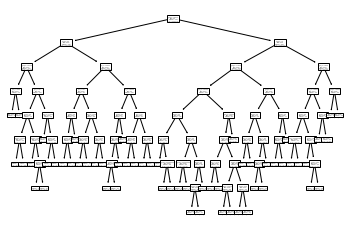

In [27]:
tree.plot_tree(treeClassifier)
